In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("spotify-2023.csv", encoding = 'cp1251')
print(data.head(10))

                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023       

In [3]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [46]:
data['streams'].fillna(0, inplace=True)
data['streams'] = data['streams'].astype('int64')
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

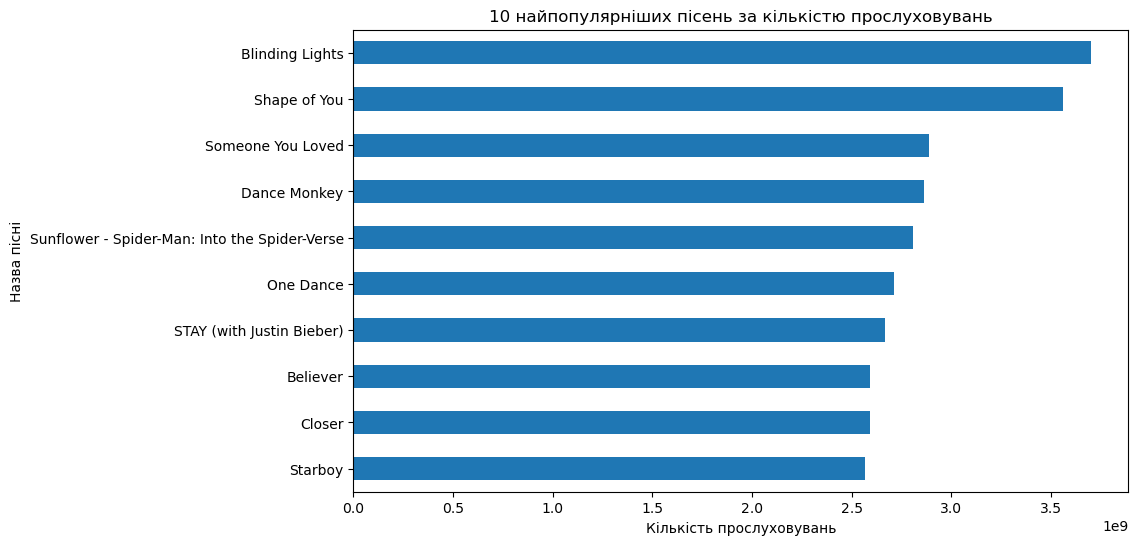

In [49]:
#  1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову
#  діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у
#  2023 році за кількістю прослуховувань.

popular_songs = data.groupby('track_name')['streams'].sum()
top_songs = popular_songs.nlargest(10)

plt.figure(figsize=(10, 6))
top_songs.plot(kind='barh')
plt.title('10 найпопулярніших пісень за кількістю прослуховувань')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.gca().invert_yaxis()
plt.show()

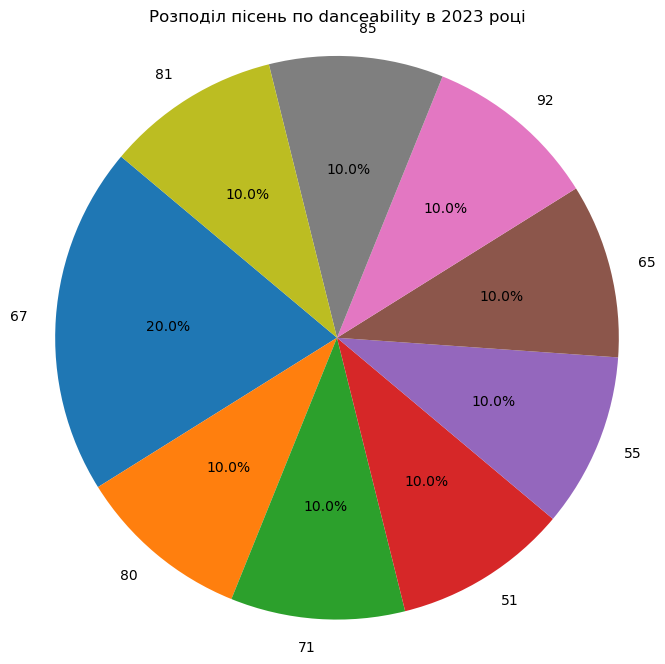

In [50]:
#  2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або
#  секторну діаграму, яка відображає розподіл жанрів серед
#  найпопулярніших пісень у 2023 році.
top_songs_in_2023_danceability = data["danceability_%"].head(10)

dance_counts = top_songs_in_2023_danceability.value_counts()
labels = dance_counts.index
sizes = dance_counts.values

colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл пісень по danceability в 2023 році')
plt.axis('equal') 
plt.show()

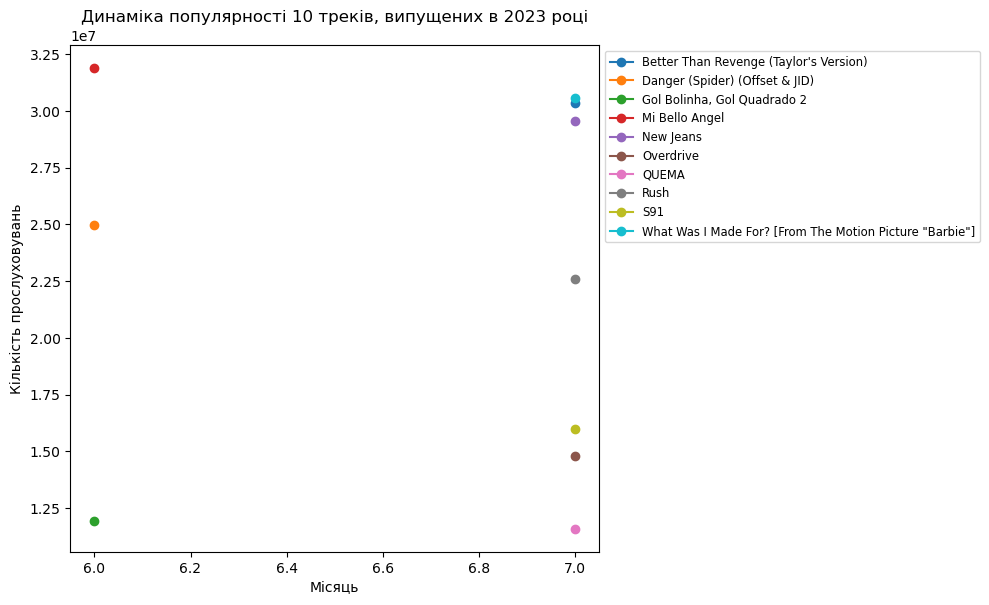

In [71]:
#  3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний
#  графік, який відображає зміни кількості прослуховувань певного треку
#  протягом року 2023 року.

top_song_created_in_2023 = data[data["released_year"] == 2023].sort_values(by="streams").head(10).groupby("track_name")
# , ascending=False

plt.figure(figsize=(10, 6))
for name, group in top_song_created_in_2023:
    plt.plot(group["released_month"], group["streams"], label=name, marker='o', linestyle='-')

plt.title('Динаміка популярності 10 треків, випущених в 2023 році')
plt.xlabel('Місяць')
plt.ylabel('Кількість прослуховувань')
plt.legend(loc='upper left', bbox_to_anchor=(1., 1), fontsize='small')
plt.tight_layout()
plt.show()


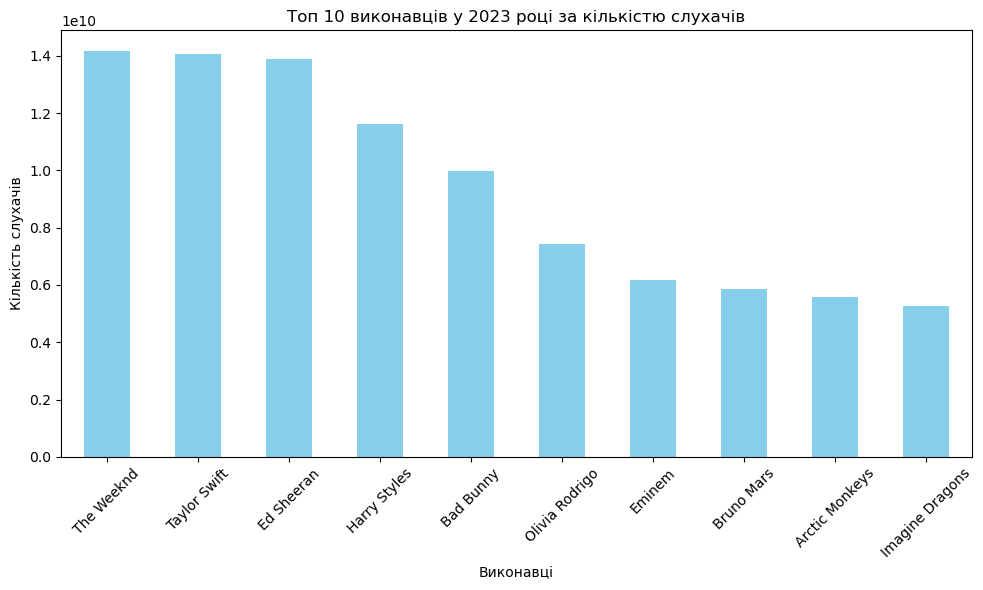

In [70]:
#  4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій
#  відображаються 10 найпопулярніших артистів на Spotify у 2023 році за
#  кількістю слухачів.

data.dropna(subset=['streams'], inplace=True)

artist_popularity = data.groupby("artist(s)_name")["streams"].sum()

top_10_artists = artist_popularity.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.title('Топ 10 виконавців у 2023 році за кількістю слухачів')
plt.xlabel('Виконавці')
plt.ylabel('Кількість слухачів')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


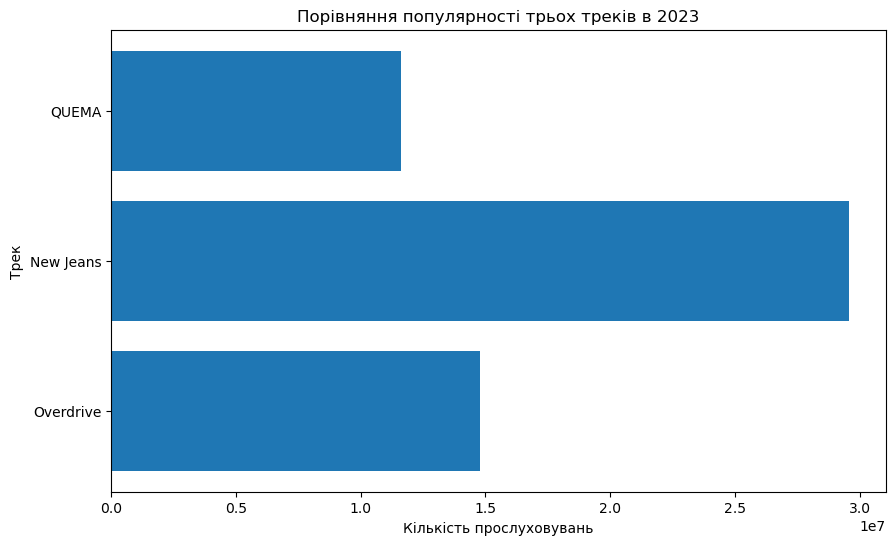

In [81]:
#  5. Порівняння популярності трьох треків: Побудуйте горизонтальну
#  стовпчикову діаграму, яка порівнює кількість прослуховувань трьох
#  конкретних треків у 2023 році.

selected_tracks = ["New Jeans", "Overdrive", "QUEMA"]
tracks_data = data[(data["released_year"] == 2023) & data["track_name"].isin(selected_tracks)]

plt.figure(figsize=(10, 6))
plt.barh(tracks_data["track_name"], tracks_data["streams"])
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Трек')
plt.title('Порівняння популярності трьох треків в 2023')
plt.show()


**Висновок:** на практичній роботі я поглибив знання з мови програмування Python, використовуючи бібліотеку "matpolib". Протягом роботи я створював стовпчикову, лінійну та секторну діаграми.